# This notebook contains the analysis scripts for the blog post about data jobs in Europe:
## https://methodmatters.github.io/data-jobs-europe

In [1]:
import re
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import colorcet as cc
pd.set_option('display.max_columns', None)
plt.rcParams['figure.figsize'] = [15, 10]
sns.set(style='darkgrid')

In [2]:
# note: you'll need matplot lib >= 3.4
import matplotlib
matplotlib.__version__


'3.4.1'

In [3]:
# load the data
# change in_dir to the location that you've saved the file
in_dir = '../Data/'
with open(in_dir + 'omnibus_jobs_df.pickle', 'rb') as handle:
    omnibus_jobs_df = pickle.load(handle)
omnibus_jobs_df.shape

(6590, 29)

In [4]:
# look at a random sample of 7 observations
omnibus_jobs_df.sample(7)

,employer_id,company_name,job_id,job_title,job_function,job_description_text,job_skills,education_desired,job_location,company_hq_location,company_sector_name,company_industry,company_type,company_size,company_revenue,company_year_founded,company_website,rating_global,rating_comp_ben,rating_culture_values,rating_career_opportunities,rating_w_life_balance,rating_sr_mgt,query_country,date_job_posted,date_job_expires,age_job_posting_days,scraping_date,language
1123,d0fbcc6f36c20c29857f4394c8599de4,International Business Machines Corporation,4b3afee01585a4a31e106b0d24cde62e,Data Scientist - Medical Device Manufacturer (...,data scientist,"Introduction As a Data Scientist at IBM, you w...","[TensorFlow, D3.js, Python]","[Master's degree, Bachelor's degree]",Munich,"Armonk, NY",Information Technology,IT Services,Company - Public,10000+ Employees,$10+ billion (USD),1911.0,www.ibm.com,3.9,3.4,4.0,3.8,4.0,NaN,germany,2021-08-11,2021-09-18,7,2021-08-19,en
2188,f3744ea6b95803e94c20364a23bf3189,Citigroup Inc.,19ccb665b8e865989ac2aa28a1ce650f,Data Scientist - Java/ Python,data scientist,We are seeking a talented Data Scientist with ...,"[Oracle, Software deployment, Spark, R, Git, J...",[],"London, England","New York, NY",Finance,Investment Banking & Asset Management,Company - Public,10000+ Employees,$10+ billion (USD),1812.0,www.citigroup.com,3.9,3.7,3.8,3.8,3.4,NaN,united_kingdom,2021-08-13,2021-09-18,6,2021-08-19,en
1863,1cc9c0743d760fb5a7205301581001a5,Vivantes - Netzwerk Fur Gesundheit Gmbh,ac1c26441f1411c25c5b8f443af7037e,Data scientist Machine / Reinforcement Learnin...,data scientist,"Job ID: 6441 Lieu:Toulouse, FR Vitesco Technol...","[English, SQL, C++, C, Python]","[Doctoral degree, Master's degree]",Toulouse,"Berlin, Germany",Health Care,Health Care Services & Hospitals,Unknown,10000+ Employees,$1 to $2 billion (USD),2001.0,www.vivantes.de,NaN,3.3,3.2,3.2,2.8,NaN,france,2021-08-06,2021-09-18,13,2021-08-19,fr
1916,35db7d54c7f3262c8a0acf001eebde0e,DEVEUM France,4cd1baadd642ab524d384f6381612171,Data Scientist / Chef de projet Intelligence A...,data scientist,Notre équipe d’ingénieurs de haut niveau est a...,"[C, Python]","[Doctoral degree, Master's degree]",Aubagne,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,france,2021-08-12,2021-09-18,6,2021-08-19,fr
5268,57e7fb10dd34d7dd9157a9382d2d6ec3,Scania AB,c6bf5171cc73389574d9a9fef45e703a,Data engineer H/F,data engineer,Description de l'entreprise : Scania : Scania ...,"[English, AWS, Organizational skills]",[Master's degree],Angers,"Södertälje, Sweden",Manufacturing,Transportation Equipment Manufacturing,Company - Public,10000+ Employees,$10+ billion (USD),NaN,www.scania.se,4.1,3.6,4.1,3.7,4.1,NaN,france,2021-10-14,2021-11-14,1,2021-10-15,fr
258,83b52389fcc42d33f4a6d4e68be0e138,Kubrick Group,8aada854d9ec7beac59ea073e7043223,Graduate Machine Learning Engineer - UK,machine learning engineer,A bit about us: We are an award-winning consul...,[Communication skills],[Bachelor's degree],"London, England","London, United Kingdom",Information Technology,IT Services,Company - Private,501 to 1000 Employees,Unknown / Non-Applicable,2016.0,www.kubrickgroup.com,4.2,3.8,4.0,4.5,4.0,4.0,united_kingdom,2021-12-21,2022-01-23,2,2021-12-24,en
2373,f3744ea6b95803e94c20364a23bf3189,Citigroup Inc.,1e1d0ac0ead89861991d011be2461540,Market Data Analyst,data analyst,Function: This role sits within the Market Dat...,"[Microsoft Office, Analysis skills, Communicat...",[Bachelor's degree],"Belfast, Northern Ireland","New York, NY",Finance,Investment Banking & Asset Management,Company - Public,10000+ Employees,$10+ billion (USD),1812.0,www.citigroup.com,3.9,3.7,3.8,3.8,3.4,NaN,united_kingdom,2021-08-12,2021-09-18,7,2021-08-19,en


In [5]:
omnibus_jobs_df.query_country.value_counts()

united_kingdom    1661
germany           1658
france            1504
netherlands        869
belgium            440
ireland            394
luxembourg          64
Name: query_country, dtype: int64

In [6]:
# look at a randomly selected job description text
# (note - they are not all in English!)
[x for x in omnibus_jobs_df.job_description_text.sample(1)]

["Mission Dans le cadre de sa croissance, notre agence lilloise recrute des profils Data Engineers expérimentés (HF). Vous êtes passionné par le Big Data ?Vous êtes capable d’évaluer & d’optimiser l’architecture de données ?Vous êtes à l’aise avec un des langages appliqués à l’analyse de données (Python, Scala, R, Java) ?Vous avez déjà travaillé avec des Frameworks tels que Hadoop ou Spark et/ou disposez d’une expérience dans un environnement Cloud (GCP, Azure, AWS) ?Rencontrons-nous ! Profil Vous possédez une expérience significative sur des missions aux environnements similaires à ceux évoqués ci-dessus. La connaissance d’un ETL serait un plus (Talend, Stambia, ODI, etc.)Vous appréciez le travail en équipe dans un contexte agile, et aimez relever des challenges techniquesLa maîtrise de l’anglais est un vrai plus ! Organisation Inetum est une ESN agile, une société de services et de solutions digitales, et un groupe international qui aide les entreprises et institutions à tirer le mei

# 1. Checks value counts of our key variables

In [7]:
omnibus_jobs_df.job_location.value_counts()

London, England    647
Paris              575
Berlin             408
Dublin             244
Amsterdam          229
                  ... 
Rastede              1
Durham, England      1
Villepinte           1
Everberg             1
Cestas               1
Name: job_location, Length: 886, dtype: int64

In [8]:
omnibus_jobs_df.company_sector_name.value_counts()

Business Services                     1157
Information Technology                1141
Finance                                418
Manufacturing                          292
Retail                                 252
Biotech & Pharmaceuticals              139
Insurance                              136
Oil, Gas, Energy & Utilities           111
Health Care                             76
Media                                   76
Government                              69
Telecommunications                      66
Education                               65
Aerospace & Defense                     59
Accounting & Legal                      54
Transportation & Logistics              52
Travel & Tourism                        43
Construction, Repair & Maintenance      31
Non-Profit                              26
Real Estate                             22
Arts, Entertainment & Recreation        21
Consumer Services                       18
Agriculture & Forestry                  11
Restaurants

In [9]:
omnibus_jobs_df.company_size.value_counts()

10000+ Employees           1437
1001 to 5000 Employees      805
51 to 200 Employees         759
1 to 50 Employees           745
Unknown                     725
201 to 500 Employees        545
501 to 1000 Employees       356
5001 to 10000 Employees     338
Name: company_size, dtype: int64

# 2. Set up the color palettes we'll use below

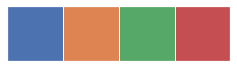

In [10]:
# set up custom color palette to ensure roles have consistent colors in plots below
role_dict = ['data scientist', 'data engineer', 'data analyst', 'machine learning engineer']
custom_palette = sns.color_palette("deep", 4) 
role_palette = dict(zip(role_dict, custom_palette))
sns.palplot(custom_palette)

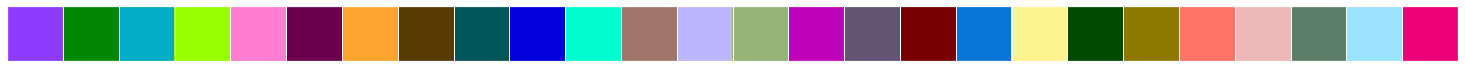

In [11]:
# set up the palette for the frequency charts
frequency_palette = sns.color_palette(cc.glasbey, n_colors=27)[1:27]
sns.palplot(frequency_palette)

# 3. Plots Basic Descriptives / Frequencies

### Plot Number of Ads Per Job Title

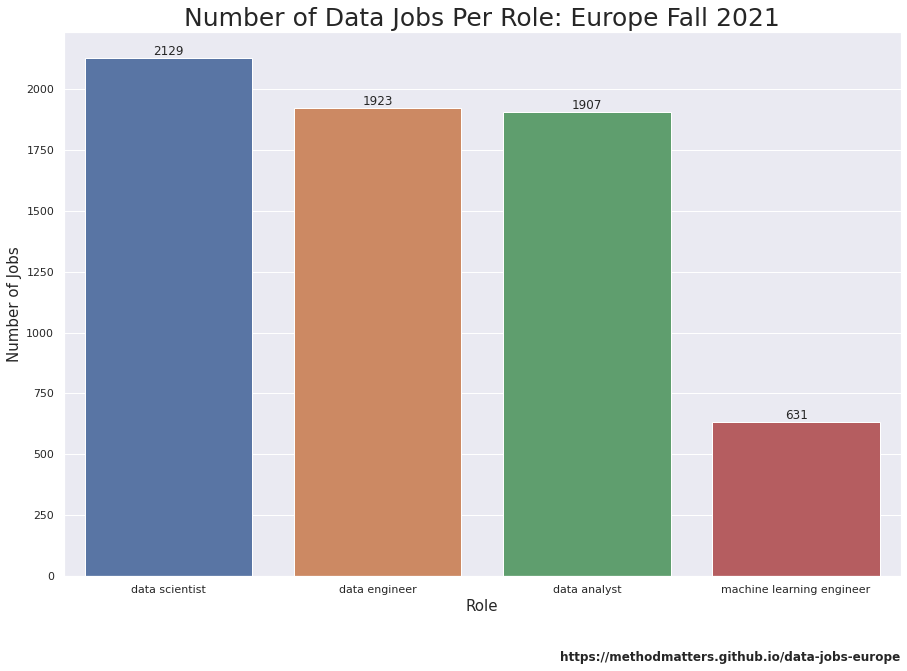

In [12]:
ax = sns.countplot(x="job_function", data=omnibus_jobs_df,
                  order = omnibus_jobs_df.job_function.value_counts().index,
                  palette = role_palette)
ax.bar_label(ax.containers[0])
ax.set(xlabel='Role')  
ax.set(ylabel='Number of Jobs')  
ax.set_title('Number of Data Jobs Per Role: Europe Fall 2021', fontsize = 25)
# Add a footnote below and to the right side of the chart
ax.annotate('https://methodmatters.github.io/data-jobs-europe',
            xy = (1.0, -0.15),
            xycoords='axes fraction',
            ha='right',
            va="center",
            fontsize=12, 
           weight = 'bold')
ax.xaxis.get_label().set_fontsize(15)
ax.yaxis.get_label().set_fontsize(15)

In [13]:
# function to produce the frequency plots
def plot_top_categories(df_f, col_f, cutoff_f, x_axis_label_f, y_axis_label_f, title_f, *args, **kwargs):
    plot_out_dir_f = kwargs.get('plot_out_dir_f', None)
    image_file_title_f = kwargs.get('image_file_title_f', None)
    agg_df_f = df_f[col_f].value_counts().to_frame().reset_index()
    agg_df_select_f = agg_df_f[agg_df_f[col_f] > cutoff_f]
    ax = sns.barplot(y="index", x=f"""{col_f}""", 
                     data=agg_df_select_f,
                    palette = frequency_palette)
    ax.bar_label(ax.containers[0])
    ax.set(xlabel=f"""{x_axis_label_f}""")  
    ax.set(ylabel=f"""{y_axis_label_f}""")  
    ax.xaxis.get_label().set_fontsize(15)
    ax.yaxis.get_label().set_fontsize(15)
    ax.set_title(f"""{title_f}""", fontsize = 25)
    # Add a footnote below and to the right side of the chart
    ax.annotate('https://methodmatters.github.io/data-jobs-europe',
                xy = (1.0, -0.15),
                xycoords='axes fraction',
                ha='right',
                va="center",
                fontsize=12, 
               weight = 'bold')
    # save out the picture (optional) to a file
    if plot_out_dir_f and image_file_title_f:
        plt.tight_layout()
        fig = ax.get_figure()
        fig.savefig(plot_out_dir_f + f"""{image_file_title_f}""" + '_250.png'  , dpi=250) 
        fig.savefig(plot_out_dir_f + f"""{image_file_title_f}""" + '.png' ) 

### Plot Top Cities for Data jobs

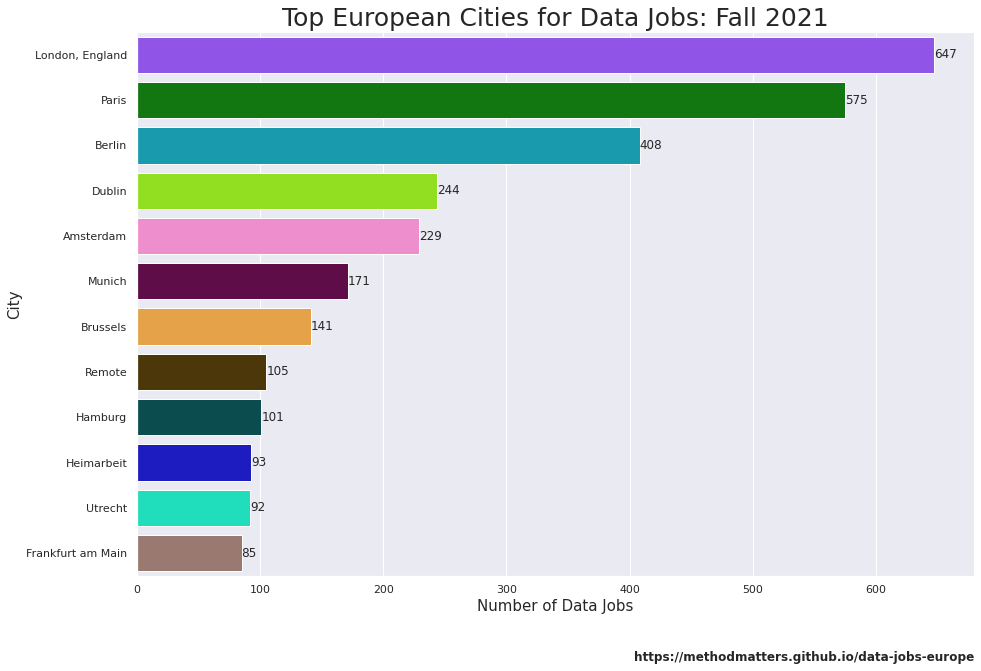

In [14]:
plot_top_categories(df_f = omnibus_jobs_df, 
                    col_f = 'job_location', 
                    cutoff_f = 75, 
                    x_axis_label_f = 'Number of Data Jobs', 
                    y_axis_label_f = 'City',
                    title_f = 'Top European Cities for Data Jobs: Fall 2021')

### Breakdown of Job Titles For Top Cities

In [15]:
# function to count jobs per city per role & retain only the top cities
def prepare_city_job_fn_data(data_f):
    ct_df_f = pd.crosstab(data_f.job_location, data_f.job_function).stack().reset_index().rename(columns={0:'value'})
    cities_to_keep = ['London, England', 'Paris', 'Berlin', 'Dublin', 'Amsterdam', 'Munich', 'Brussels']
    ct_df_to_plot_f = ct_df_f[ct_df_f.job_location.isin(cities_to_keep)].reset_index(drop = True)
    return(ct_df_to_plot_f)

In [16]:
# apply the function to our dataframe
ct_df = prepare_city_job_fn_data(omnibus_jobs_df)

In [17]:
# here we have the counts
ct_df.head()

,job_location,job_function,value
0,Amsterdam,data analyst,66
1,Amsterdam,data engineer,69
2,Amsterdam,data scientist,73
3,Amsterdam,machine learning engineer,21
4,Berlin,data analyst,79


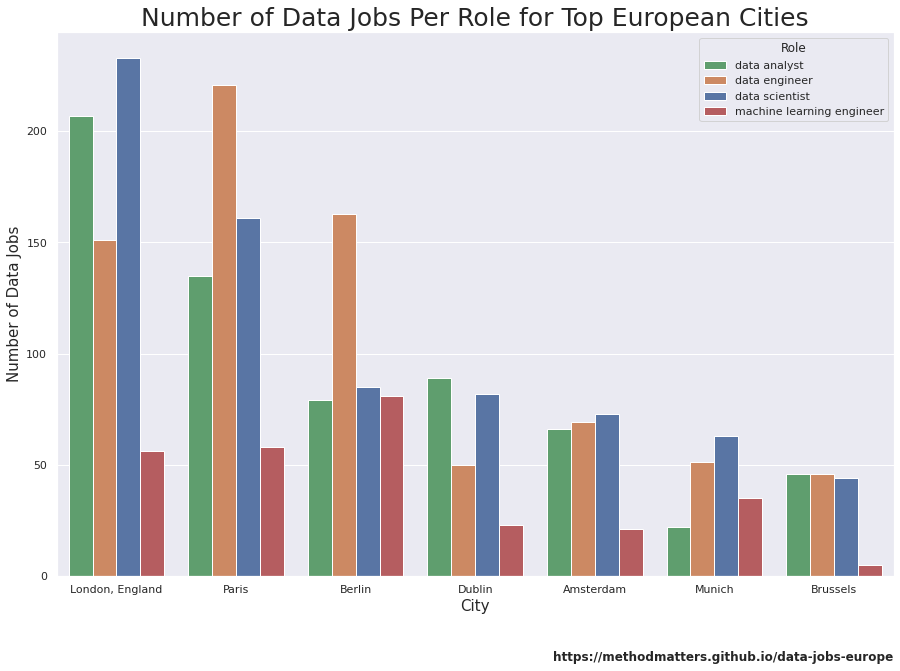

In [18]:
# make the plot
ax = sns.barplot(x="job_location", y="value", hue="job_function", data=ct_df,
                order = ct_df.iloc[ct_df[ct_df['job_function'] == 'data scientist']['value'].sort_values(ascending = False).index]['job_location'],
                palette = role_palette)
plt.legend(title='Role')
ax.set(ylabel='Number of Data Jobs')  
ax.set(xlabel='City')  
ax.set_title('Number of Data Jobs Per Role for Top European Cities', fontsize = 25)
# Add a footnote below and to the right side of the chart
ax.annotate('https://methodmatters.github.io/data-jobs-europe',
            xy = (1.0, -0.15),
            xycoords='axes fraction',
            ha='right',
            va="center",
            fontsize=12, 
           weight = 'bold')
ax.xaxis.get_label().set_fontsize(15)
ax.yaxis.get_label().set_fontsize(15)

### Plot Number of Ads Per Company Sector

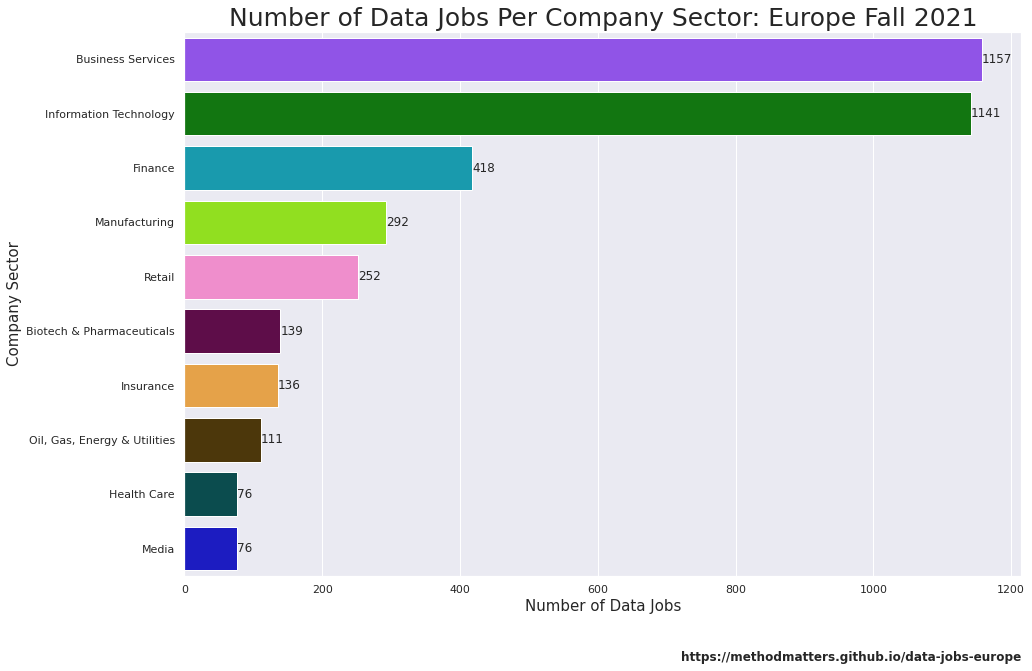

In [19]:
plot_top_categories(df_f = omnibus_jobs_df, 
                    col_f = 'company_sector_name', 
                    cutoff_f = 75, 
                    x_axis_label_f = 'Number of Data Jobs', 
                    y_axis_label_f = 'Company Sector',
                    title_f = 'Number of Data Jobs Per Company Sector: Europe Fall 2021')

### Plot Number of Ads Per Company Industry (not in blog post)

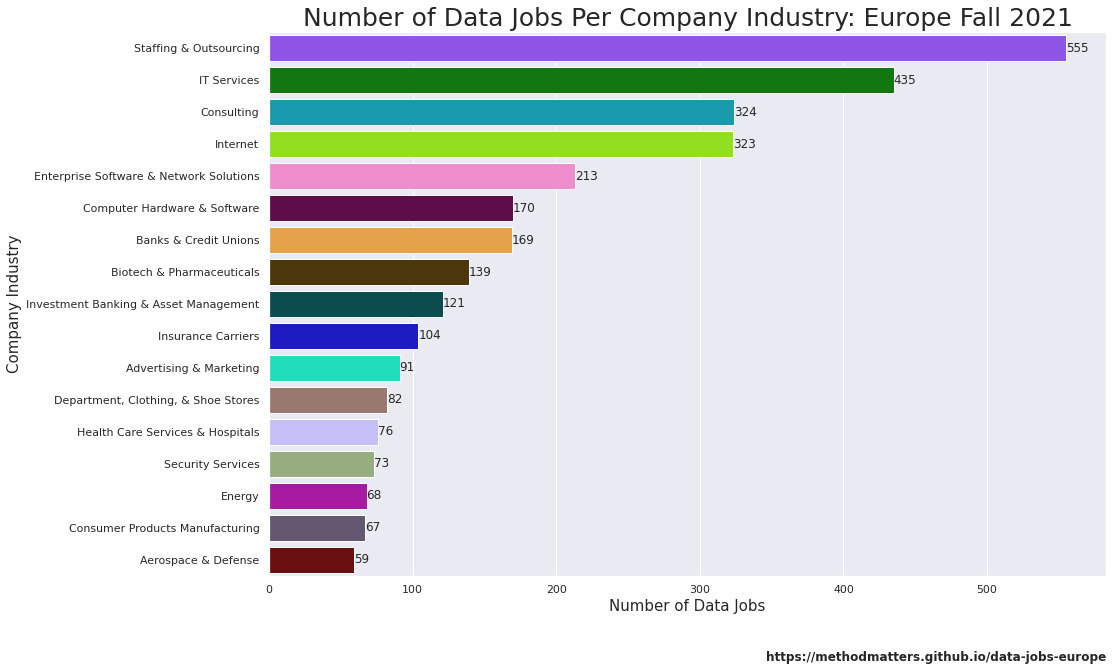

In [20]:
plot_top_categories(df_f = omnibus_jobs_df, 
                    col_f = 'company_industry', 
                    cutoff_f = 50, 
                    x_axis_label_f = 'Number of Data Jobs',   
                    y_axis_label_f = 'Company Industry',
                    title_f = 'Number of Data Jobs Per Company Industry: Europe Fall 2021')

### Plot Number of Ads Per Company Size

In [21]:
# make a higher-level grouping of company size
omnibus_jobs_df['company_size_grouped'] = omnibus_jobs_df['company_size'].replace({'1 to 50 Employees': '1 to 500 employees', 
                                          '51 to 200 Employees': '1 to 500 employees',
                                         '201 to 500 Employees':'1 to 500 employees',
                                          'Unknown': np.nan  })

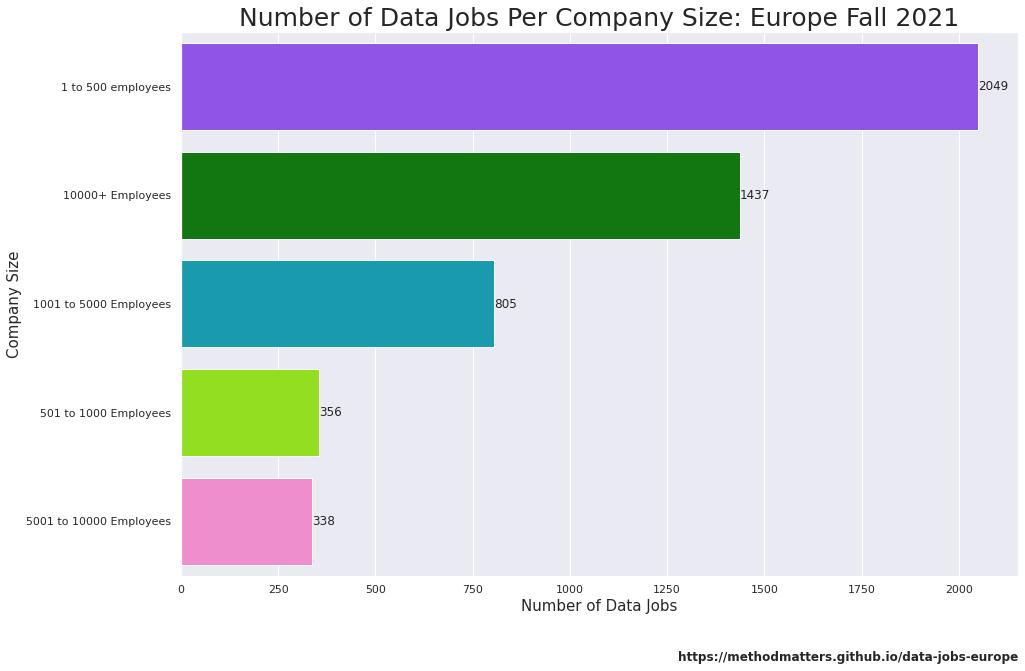

In [22]:
plot_top_categories(df_f = omnibus_jobs_df, 
                    col_f = 'company_size_grouped', 
                    cutoff_f = 50, 
                    x_axis_label_f = 'Number of Data Jobs',   
                    y_axis_label_f = 'Company Size',
                    title_f = 'Number of Data Jobs Per Company Size: Europe Fall 2021')

# 4. Top skills from employer-determined keyword list

In [23]:
import collections
def extract_count_skill_list(skill_col_f):
    # make an omnibus list with the individual lists in the columns of the df
    list_of_keyword_lists = [x for x in skill_col_f]
    # flatten the list of lists into a single list
    # https://stackoverflow.com/questions/952914/how-to-make-a-flat-list-out-of-a-list-of-lists
    flat_list = [item.strip() for sublist in list_of_keyword_lists for item in sublist]
    # count the number of occurrences of each skill in the flat list 
    counter = collections.Counter(flat_list)
    # make the counter object a dataframe
    df_f = pd.DataFrame.from_dict(counter, orient='index').reset_index()
    # change the column names of the df
    df_f.columns = ['Skill', 'Frequency']
    # sort the df by frequency, so skills that appear most
    # are at the top
    df_f = df_f.sort_values(by = 'Frequency', ascending=False)
    return(df_f)
    

In [24]:
skill_count_df = extract_count_skill_list(omnibus_jobs_df.job_skills)
skill_count_df.shape

(341, 2)

In [25]:
skill_count_df.head()

,Skill,Frequency
0,Python,3656
15,SQL,2364
17,English,1297
29,Spark,978
14,R,873


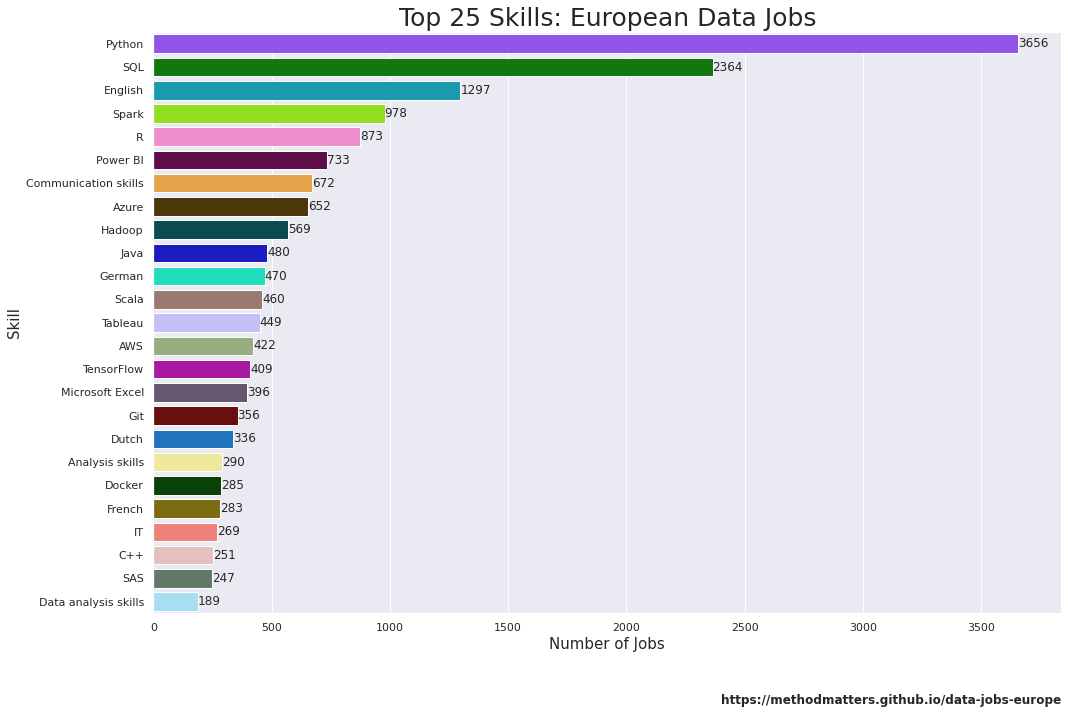

In [26]:
# plot the top skills and set the axis labels  
ax = sns.barplot(y = 'Skill', x ="Frequency",   
                            data=skill_count_df[0:25], orient ='h', 
                palette = frequency_palette)  
ax.bar_label(ax.containers[0])
ax.set(xlabel='Number of Jobs')  
ax.set(ylabel='Skill') 
ax.set_title('Top 25 Skills: European Data Jobs', fontsize = 25)
ax.xaxis.get_label().set_fontsize(15)
ax.yaxis.get_label().set_fontsize(15)
ax.annotate('https://methodmatters.github.io/data-jobs-europe',
            xy = (1.0, -0.15),
            xycoords='axes fraction',
            ha='right',
            va="center",
            fontsize=12, 
           weight = 'bold')
plt.tight_layout()

# 5. Cluster map of job functions based on employer-determined keyword list

In [27]:
# make a dummy dataframe for the skills
# 1 row per job ad, with skills in the columns
# and 1/0 for presence/absence of the skill in the ad
# https://stackoverflow.com/questions/29034928/pandas-convert-a-column-of-list-to-dummies
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
def prepare_binarized_dummies_from_skills(df_f, skills_col_f, job_fn_col_f):
    # prepare matrix of dummies - one col per skill, 0/1 for absence/presence
    doc_perc_skills = pd.DataFrame(mlb.fit_transform(df_f[skills_col_f]),columns=mlb.classes_, index=df_f.index)
    # num rows in orig input matrix
    num_rows_input = doc_perc_skills.shape[0]
    print('number of rows in input data:')
    print(num_rows_input)
    total_num_skills = doc_perc_skills.shape[1]
    print('total number of skills in input data:')
    print(total_num_skills)
    # print('skills in input data:')
    # print([x for x in doc_perc_skills.columns])
    return(doc_perc_skills)


    

In [28]:
dummy_df = prepare_binarized_dummies_from_skills(omnibus_jobs_df, 'job_skills', 'job_function')

number of rows in input data:
6590
total number of skills in input data:
341


In [29]:
dummy_df.head()

,.NET,.NET Core,4G/LTE,5G,ABAP,AJAX,APIs,ASP,ASP.NET,AWS,Accounting,Active Directory,Administrative experience,Adobe Analytics,Adobe Campaign,Agile,Agriculture,Alteryx,Analysis skills,Analytics,Android,Angular,Ansible,Ant,Apache,Apache Hive,Apache Pig,Application development,Arabic,ArcGIS,Assembly,Auditing,Avaya,Azure,B2B,Backbone.js,Bamboo,Banking,Big data,Bilingual,Bloomberg,Bootstrap,Business analysis,Business development,Business intelligence,Business requirements,C,C#,C++,CAD,CI/CD,CRM software,CSS,Cassandra,CentOS,Chef,Chinese,Clojure,Cloud architecture,Cloud computing,Cognos,Communication skills,Computer literacy,Computer networking,Computer science,Computer skills,Computer vision,Confluence,Construction,Continuous integration,Copywriting,Crystal Reports,Customer service,Cybersecurity,D3.js,DB2,Data analysis skills,Data analytics,Data collection,Data mining,Data modeling,Data science,Data warehouse,Database administration,Database management,Database marketing,Databases,Debian,Debugging,Deep learning,Dementia care,Digital marketing,Distributed systems,Django,Docker,Driving,Drupal,Dutch,DynamoDB,E-commerce,ECMAScript,ERP systems,Elasticsearch,Electrical engineering,Electrical experience,Email marketing,English,Erlang,Express.js,FTP,FileMaker,Financial acumen,Financial services,Firewall,Fortran,French,German,Git,GitHub,GitLab,Go,Google AdWords,Google Ads,Google Analytics,Google Cloud Platform,Google Docs,Google Suite,Google Tag Manager,GraphQL,HBase,HRIS,HTML5,HTTPS,Hadoop,Haskell,Heavy lifting,Heroku,Hospitality,HubSpot,Human resources,IIS,IP networking,IT,IaaS,Identity & access management,Image processing,Informatica,Internet of things,Italian,JD Edwards,JDBC,JSON,JSP,JUnit,Java,JavaScript,Jenkins,Jira,Kafka,Korean,Kubernetes,LabView,Leadership,Linux,Load balancing,Logistics,Lucene,MATLAB,Mac OS,Machine learning,MailChimp,Maintenance,Management,Manufacturing,Marketing,Math,Maven,Mechanic experience,Mechanical knowledge,Mentoring,Merchandising,Mesos,MicroStation,Microsoft Access,Microsoft Dynamics Navision,Microsoft Excel,Microsoft Office,Microsoft Outlook,Microsoft Powerpoint,Microsoft Project,Microsoft SQL Server,Microsoft Windows Server,Microsoft Word,Minitab,MongoDB,MySQL,NFS,NIS,Natural language processing,Neo4j,NetSuite,Network architecture,NoSQL,Node.js,Norwegian,OBIEE,OOP,Objective-C,OpenStack,Operating systems,Oracle,Organizational skills,PHP,PL/SQL,PaaS,Pardot,Pegasystems,Pentaho,PeopleSoft,Perforce,Perl,Pivot tables,Polish,Portuguese,PostgreSQL,Power BI,PowerShell,Presentation skills,Process management,Product development,Project management,Project planning,Public speaking,Puppet,Purchasing,Python,QlikView,Qualitative analysis,Quality assurance,QuickBooks,R,React,React Native,Redis,Redshift,Relational databases,Requirements gathering,Research,Restaurant experience,Revit,Root cause analysis,Ruby,Russian,Rust,S3,SAFe,SAP,SAP BW 4HANA,SAP BusinessObjects,SAP ERP,SAP HANA,SAP S/4HANA,SAP SuccessFactors,SAP Supply Chain Management,SAS,SCCM,SEO,SOAP,SPARQL,SPSS,SQL,SQL Server Management Studio,SSIS,SVN,Sage,Sales,Salesforce,Salesforce Marketing Cloud,Scala,Schematics,Scripting,Scrum,Selenium,ServiceNow,SharePoint,Shell Scripting,Smartsheet,Social media management,Social media marketing,Software architecture,Software deployment,Software development,Software testing,Solr,Spanish,Spark,Splunk,Spring,Stata,Statistical software,Statistics,Supervising experience,Surveillance,Swedish,Swift,T-SQL,TFS,Tableau,Teaching,Team management,TensorFlow,Teradata,Terraform,Time management,Tomcat,Turkish,Tutoring,TypeScript,Typing,UML,UX,Ubuntu,Unity,Unreal Engine,Visio,Visual Basic,Visual Studio,WAN,Warehouse experience,Warehouse management system,Web development,Windows,WordPress,Workday,Writing skills,XML,XSLT,Xero,Yardi,iOS,jQuery
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [30]:
# dictionary for aggregation of certain skills into higher-level groupings
skill_aggregation_dict = {"ASP":['ASP', 'ASP.NET'],
".NET": ['.NET', '.NET Core'],
"Apache": [ 'Apache', 'Apache Hive', 'Apache Pig'],
"Language skills (e.g. English, French, etc.)":['Arabic','Bilingual', 'Chinese',  'Dutch', 'English', 'French', 'German', 'Italian', 'Korean', 'Norwegian',  'Polish','Turkish',  'Portuguese', 'Russian',  'Spanish', 'Swedish' ],
"Cloud platforms (e.g. AWS, GCP, etc.)": [ 'Azure', 'AWS',  'Google Cloud Platform', 'S3', 'Cloud architecture', 'Cloud computing'],
"C":['C', 'C#', 'C++'],
"Data analysis": ['Data analysis skills', 'Analysis skills', 'Data analytics', 'Analytics'],
"Databases": [ 'Data warehouse', 'Database administration', 'Database management', 'Databases'],
"Git":['Git', 'GitHub', 'GitLab'],
"Java":['Java', 'JavaScript'],
"Mentoring":['Mentoring','Tutoring', 'Teaching'],
"Microsoft Office Suite":['Microsoft Excel', 'Microsoft Office', 'Microsoft Outlook', 'Microsoft Powerpoint','Microsoft Word'],
"Google Suite":[ 'Google Docs', 'Google Suite'],
"Google Ads": ['Google AdWords', 'Google Ads', 'Google Analytics', 'Google Tag Manager'], 
"SQL":['MySQL', 'PostgreSQL', 'SQL', 'SQL Server Management Studio', 'Microsoft SQL Server' ],
"SAP": ['SAP', 'SAP BW 4HANA', 'SAP BusinessObjects', 'SAP ERP', 'SAP HANA', 'SAP S/4HANA', 'SAP SuccessFactors', 'SAP Supply Chain Management' ],
"React":['React', 'React Native' ],
"Salesforce":['Salesforce', 'Salesforce Marketing Cloud'],
"Linux":['Linux', 'Ubuntu','Debian'],
"Social media":[ 'Social media management', 'Social media marketing'],
"Marketing analytics":['Email marketing', 'Database marketing' ]}

In [31]:
# from the above dictionary, get a flat list of all the skills that will be aggregated
# we will use these to subset the dummy df for the aggregations
value_list = []
for key, value in skill_aggregation_dict.items():
    value_list.append(value)
aggregated_skills = [item for sublist in value_list for item in sublist]
aggregated_skills

['ASP',
 'ASP.NET',
 '.NET',
 '.NET Core',
 'Apache',
 'Apache Hive',
 'Apache Pig',
 'Arabic',
 'Bilingual',
 'Chinese',
 'Dutch',
 'English',
 'French',
 'German',
 'Italian',
 'Korean',
 'Norwegian',
 'Polish',
 'Turkish',
 'Portuguese',
 'Russian',
 'Spanish',
 'Swedish',
 'Azure',
 'AWS',
 'Google Cloud Platform',
 'S3',
 'Cloud architecture',
 'Cloud computing',
 'C',
 'C#',
 'C++',
 'Data analysis skills',
 'Analysis skills',
 'Data analytics',
 'Analytics',
 'Data warehouse',
 'Database administration',
 'Database management',
 'Databases',
 'Git',
 'GitHub',
 'GitLab',
 'Java',
 'JavaScript',
 'Mentoring',
 'Tutoring',
 'Teaching',
 'Microsoft Excel',
 'Microsoft Office',
 'Microsoft Outlook',
 'Microsoft Powerpoint',
 'Microsoft Word',
 'Google Docs',
 'Google Suite',
 'Google AdWords',
 'Google Ads',
 'Google Analytics',
 'Google Tag Manager',
 'MySQL',
 'PostgreSQL',
 'SQL',
 'SQL Server Management Studio',
 'Microsoft SQL Server',
 'SAP',
 'SAP BW 4HANA',
 'SAP BusinessObj

In [32]:
# aggregate the skills using the dictionary
# put the aggregated skills back into dummy df
def aggregate_skills(dummy_df_f, aggregated_skills_f, skill_aggregation_dict_f):
    # we make new df only containing the columns we will aggregate
    # this db will be used to do the additions
    df_to_agg_f = dummy_df_f[aggregated_skills_f]
    # remove aggregation cols from original dummy df
    dummy_trim_df_f = dummy_df_f.drop(columns = aggregated_skills_f)
    # loop through the dictionary and add aggregated columns to original (now trimmed) dummy df
    for key, value in skill_aggregation_dict_f.items():
        dummy_trim_df_f[key] = df_to_agg_f[value].sum(axis=1)
    # make it binary again (summed cols can be greater than 1)
    # THERE MUST BE A BETTER WAY OF DOING THIS (suggestions welcome!)
    dummy_trim_df_f = pd.DataFrame(np.where(dummy_trim_df_f >=1,1, 0), columns = dummy_trim_df_f.columns)
    return(dummy_trim_df_f)


In [33]:
cleaned_skills_df = aggregate_skills(dummy_df, aggregated_skills, skill_aggregation_dict)
cleaned_skills_df.shape

(6590, 279)

In [34]:
cleaned_skills_df.head()

,4G/LTE,5G,ABAP,AJAX,APIs,Accounting,Active Directory,Administrative experience,Adobe Analytics,Adobe Campaign,Agile,Agriculture,Alteryx,Android,Angular,Ansible,Ant,Application development,ArcGIS,Assembly,Auditing,Avaya,B2B,Backbone.js,Bamboo,Banking,Big data,Bloomberg,Bootstrap,Business analysis,Business development,Business intelligence,Business requirements,CAD,CI/CD,CRM software,CSS,Cassandra,CentOS,Chef,Clojure,Cognos,Communication skills,Computer literacy,Computer networking,Computer science,Computer skills,Computer vision,Confluence,Construction,Continuous integration,Copywriting,Crystal Reports,Customer service,Cybersecurity,D3.js,DB2,Data collection,Data mining,Data modeling,Data science,Debugging,Deep learning,Dementia care,Digital marketing,Distributed systems,Django,Docker,Driving,Drupal,DynamoDB,E-commerce,ECMAScript,ERP systems,Elasticsearch,Electrical engineering,Electrical experience,Erlang,Express.js,FTP,FileMaker,Financial acumen,Financial services,Firewall,Fortran,Go,GraphQL,HBase,HRIS,HTML5,HTTPS,Hadoop,Haskell,Heavy lifting,Heroku,Hospitality,HubSpot,Human resources,IIS,IP networking,IT,IaaS,Identity & access management,Image processing,Informatica,Internet of things,JD Edwards,JDBC,JSON,JSP,JUnit,Jenkins,Jira,Kafka,Kubernetes,LabView,Leadership,Load balancing,Logistics,Lucene,MATLAB,Mac OS,Machine learning,MailChimp,Maintenance,Management,Manufacturing,Marketing,Math,Maven,Mechanic experience,Mechanical knowledge,Merchandising,Mesos,MicroStation,Microsoft Access,Microsoft Dynamics Navision,Microsoft Project,Microsoft Windows Server,Minitab,MongoDB,NFS,NIS,Natural language processing,Neo4j,NetSuite,Network architecture,NoSQL,Node.js,OBIEE,OOP,Objective-C,OpenStack,Operating systems,Oracle,Organizational skills,PHP,PL/SQL,PaaS,Pardot,Pegasystems,Pentaho,PeopleSoft,Perforce,Perl,Pivot tables,Power BI,PowerShell,Presentation skills,Process management,Product development,Project management,Project planning,Public speaking,Puppet,Purchasing,Python,QlikView,Qualitative analysis,Quality assurance,QuickBooks,R,Redis,Redshift,Relational databases,Requirements gathering,Research,Restaurant experience,Revit,Root cause analysis,Ruby,Rust,SAFe,SAS,SCCM,SEO,SOAP,SPARQL,SPSS,SSIS,SVN,Sage,Sales,Scala,Schematics,Scripting,Scrum,Selenium,ServiceNow,SharePoint,Shell Scripting,Smartsheet,Software architecture,Software deployment,Software development,Software testing,Solr,Spark,Splunk,Spring,Stata,Statistical software,Statistics,Supervising experience,Surveillance,Swift,T-SQL,TFS,Tableau,Team management,TensorFlow,Teradata,Terraform,Time management,Tomcat,TypeScript,Typing,UML,UX,Unity,Unreal Engine,Visio,Visual Basic,Visual Studio,WAN,Warehouse experience,Warehouse management system,Web development,Windows,WordPress,Workday,Writing skills,XML,XSLT,Xero,Yardi,iOS,jQuery,ASP,.NET,Apache,"Language skills (e.g. English, French, etc.)","Cloud platforms (e.g. AWS, GCP, etc.)",C,Data analysis,Databases,Git,Java,Mentoring,Microsoft Office Suite,Google Suite,Google Ads,SQL,SAP,React,Salesforce,Linux,Social media,Marketing analytics
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0

In [35]:
# subset the dummy df columns to those skills that appear a certain amount of times
# the threshold for the subset is a parameter (threshold_f)
# below, we subset on 50 times
# then, aggregate by role and calculate the percentage of 
# job ads per role that contain each skill
def subset_cleaned_skills(cleaned_skills_df_f, threshold_f, orig_df_f, job_fn_col_f):
    # make column with total keywords
    cleaned_skills_df_f['total_keywords'] = cleaned_skills_df_f.sum(axis=1)
    # subset columns - only those skills that appear more times than threshold
    cleaned_skills_df_subset_f = cleaned_skills_df_f.loc[:, cleaned_skills_df_f.sum(axis=0) > threshold_f]
    print('shape of matrix when only keeping those that appear more times than the threshold')
    print(cleaned_skills_df_subset_f.shape)
    # add job function from original df
    cleaned_skills_df_subset_f = cleaned_skills_df_subset_f.join(orig_df_f[job_fn_col_f])
    # remove rows with no keywords
    final_subset_f = cleaned_skills_df_subset_f[cleaned_skills_df_subset_f['total_keywords']> 0].reset_index(drop = True).drop(['total_keywords'], axis = 1)
    num_rows_input = cleaned_skills_df_f.shape[0]
    final_num_rows = final_subset_f.shape[0]
    final_num_skills = final_subset_f.shape[1]
    print('number of rows with no skills')
    print(num_rows_input - final_num_rows)
    print('percentage of rows with at least 1 skill')
    print((final_num_rows/num_rows_input) * 100)
    print('final number of skills retained:')
    print(final_subset_f.shape[1])
    # aggregate the data by job function (role) and calculate the percentage
    # of ads per role that contain each skill
    agg_df_f = final_subset_f.groupby(['job_function']).mean() * 100
    return(agg_df_f)

In [36]:
agg_df = subset_cleaned_skills(cleaned_skills_df, 50, omnibus_jobs_df, 'job_function')

shape of matrix when only keeping those that appear more times than the threshold
(6590, 53)
number of rows with no skills
873
percentage of rows with at least 1 skill
86.752655538695
final number of skills retained:
53


In [37]:
agg_df.head()

,APIs,Agile,Ansible,Big data,Business intelligence,Communication skills,Data mining,Docker,Elasticsearch,Go,HTML5,Hadoop,IT,Jenkins,Jira,Kafka,Kubernetes,Leadership,MATLAB,Marketing,MongoDB,Natural language processing,NoSQL,Node.js,Oracle,Power BI,Presentation skills,Python,R,Redshift,Relational databases,SAS,Scala,Shell Scripting,Software development,Spark,Tableau,TensorFlow,Terraform,.NET,Apache,"Language skills (e.g. English, French, etc.)","Cloud platforms (e.g. AWS, GCP, etc.)",C,Data analysis,Databases,Git,Java,Microsoft Office Suite,Google Ads,SQL,Linux
job_function,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
data analyst,0.903226,2.193548,0.000000,0.387097,4.000000,17.354839,1.483871,0.516129,0.258065,0.129032,0.580645,1.806452,6.967742,0.129032,1.225806,0.129032,0.129032,1.419355,1.419355,2.387097,0.064516,0.064516,0.516129,0.064516,3.096774,25.870968,2.193548,34.387097,11.483871,1.161290,1.354839,6.387097,0.838710,0.387097,0.322581,2.064516,13.290323,0.709677,0.258065,0.322581,0.580645,24.000000,7.419355,1.741935,16.838710,4.838710,2.193548,2.580645,28.645161,2.516129,47.935484,0.451613
data engineer,3.707929,4.620650,2.167712,2.681118,1.711352,6.446092,0.399315,8.442670,2.852253,1.654307,1.369082,18.767827,3.308614,4.962921,3.479749,8.442670,5.533371,1.083856,1.140901,0.798631,3.137479,0.171135,3.137479,1.996577,2.452938,9.754706,0.285225,67.027952,6.617228,4.905876,0.969766,1.083856,16.600114,1.825442,1.369082,31.431831,5.761552,1.939532,5.875642,2.110667,6.560183,30.290930,32.915003,6.217912,2.167712,3.422704,9.469481,16.257844,2.224758,0.399315,50.770108,3.365659
data scientist,2.207862,2.046311,0.323102,1.130856,0.807754,13.354873,4.792676,3.877221,0.861605,0.807754,0.861605,9.369952,4.738826,1.400108,1.669359,0.700054,1.507808,2.423263,4.361874,1.130856,0.969305,0.753904,2.100162,0.538503,0.915455,8.508347,1.615509,79.644588,29.079160,0.700054,1.507808,6.946688,5.761982,1.023156,1.992461,16.585891,7.646742,9.693053,0.430802,0.915455,3.177167,30.640819,16.801292,8.023694,7.323640,2.477114,9.531502,8.562197,3.231018,0.323102,40.549273,2.261712
machine learning engineer,3.052065,4.129264,1.256732,0.359066,0.000000,7.540395,0.897666,10.233393,0.359066,1.615799,0.538600,6.822262,2.692998,3.770197,3.590664,1.615799,7.719928,0.897666,1.974865,0.359066,0.359066,6.822262,1.256732,1.256732,0.000000,0.538600,0.000000,84.201077,7.001795,0.359066,0.000000,0.000000,8.797127,3.052065,4.847397,15.619390,0.000000,33.034111,2.513465,0.718133,1.974865,27.109515,16.876122,25.134650,2.333932,0.897666,6.283662,16.696589,0.179533,0.179533,16.696589,3.052065


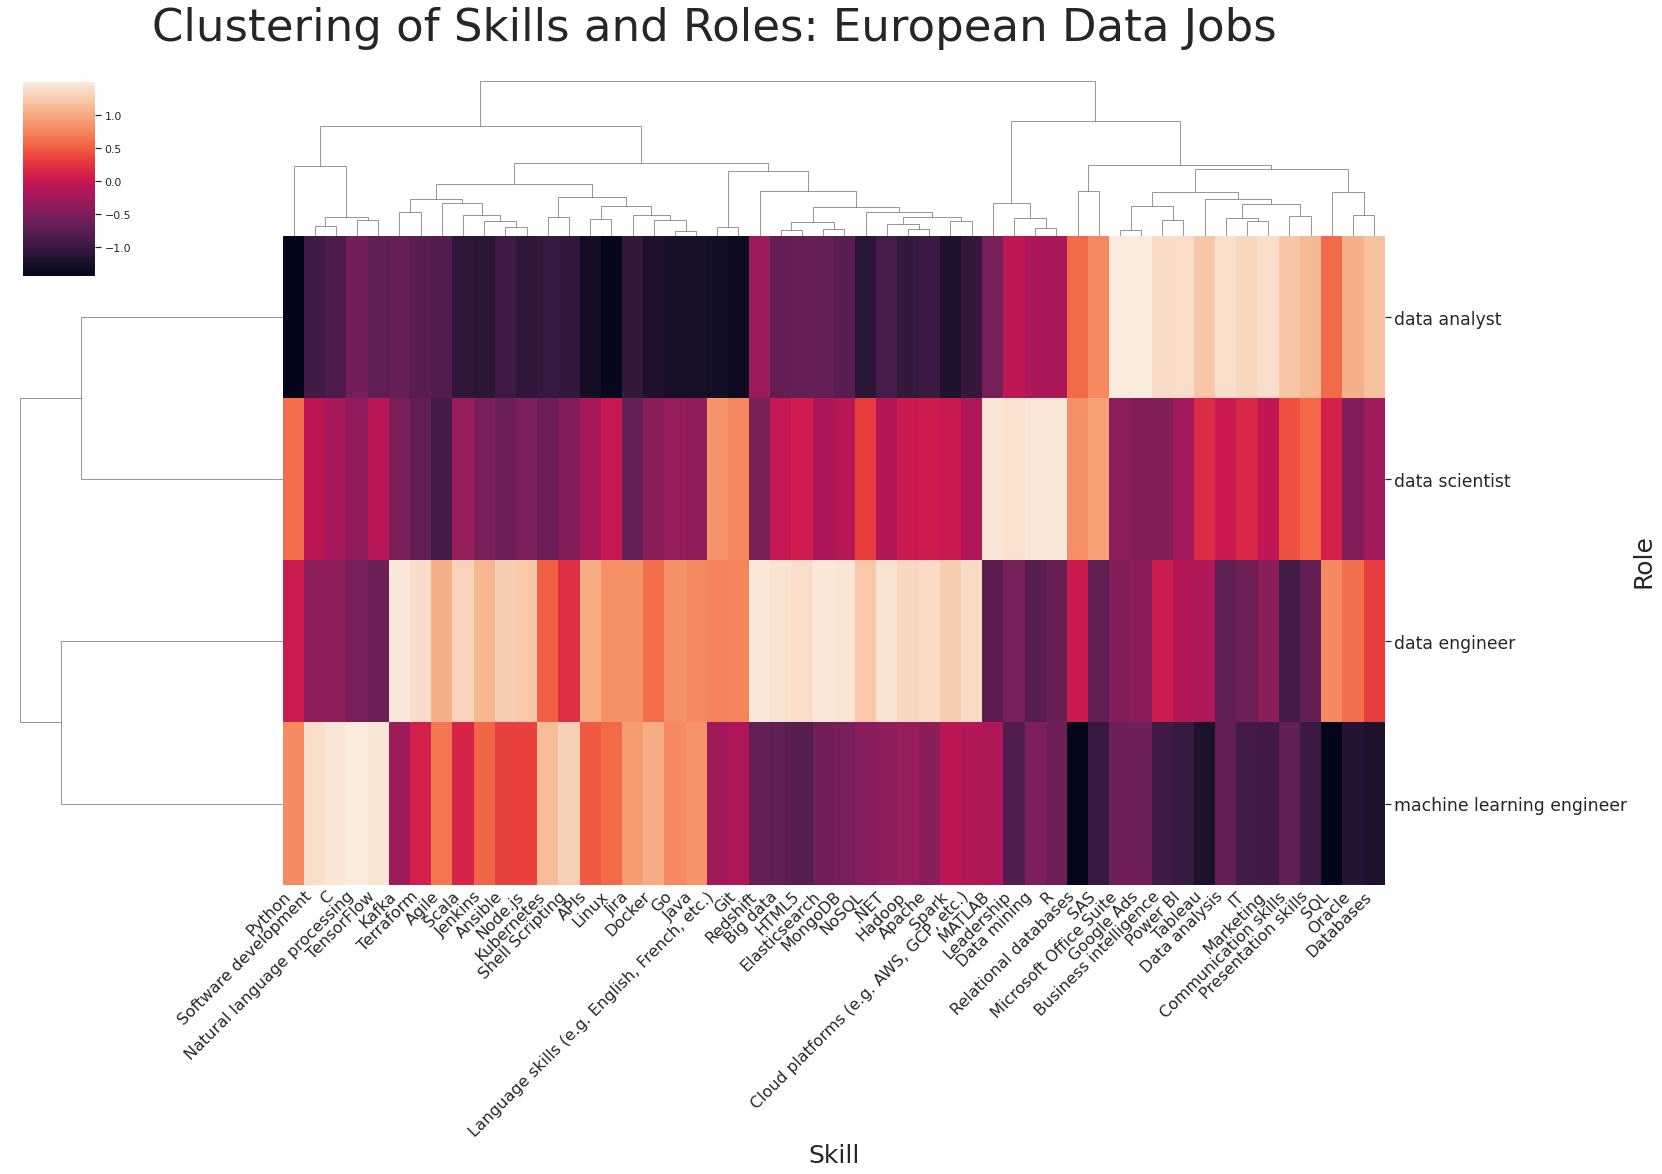

In [38]:
# pass our aggregated data to the clustermap algorithm
# and make the final plot
g = sns.clustermap(agg_df, z_score = 1, figsize=(20, 15))
plt.setp(g.ax_heatmap.xaxis.get_majorticklabels(), 
         rotation=45, 
         horizontalalignment='right', 
         verticalalignment='center_baseline',
         fontsize='x-large')
plt.setp(g.ax_heatmap.get_yticklabels(), rotation=0, fontsize='x-large') 
g.fig.suptitle(t = 'Clustering of Skills and Roles: European Data Jobs', 
               fontsize = 45,
              y = 1.05)
g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_xmajorticklabels(), fontsize = 16)
ax = g.ax_heatmap
ax.set_xlabel("Skill", fontsize= 25)
ax.set_ylabel("Role", fontsize=25);